In [1]:
"""
# PI Estimation by Monte Carlo Simulation 
-----------------------------------------

Este código implementa la estimación del número π mediante el método de Monte Carlo. Se generan puntos aleatorios dentro de un cuadrado unitario y se cuenta cuántos caen dentro de un círculo de radio 1 inscrito en dicho cuadrado. La fracción de puntos dentro del círculo permite aproximar π.

Usos (de Monte Carlo):
- Aplicaciones en integración numérica y simulaciones físicas.
- Métodos de inferencia estadística y optimización.

> https://en.wikipedia.org/wiki/Monte_Carlo_method
"""

from math import pi as PI
from numba import njit, prange
import matplotlib.pyplot as plt
import numpy as np
import time

points = np.random.rand(50_000_000, 2)


def compute_pi_serial(points: np.ndarray) -> float:
    point_count = points.shape[0]
    hit_count = 0
    for i in range(point_count):
        if points[i, 0] ** 2 + points[i, 1] ** 2 <= 1:
            hit_count += 1

    return 4 * hit_count / point_count


@njit(parallel=True)
def compute_pi_parallel(points: np.ndarray) -> float:
    point_count = points.shape[0]
    hit_count = 0
    for i in prange(point_count):
        if points[i, 0] ** 2 + points[i, 1] ** 2 <= 1:
            hit_count += 1  # https://numba.pydata.org/numba-doc/dev/user/parallel.html#explicit-parallel-loops

    return 4 * hit_count / point_count


print("PI Estimation by Monte Carlo Simulation")

serial_start = time.perf_counter()
serial_pi = compute_pi_serial(points)
serial_end = time.perf_counter()
print(
    f"""
Serial Pi: {serial_pi:.16f}
Error: {abs(PI - serial_pi)}
Time: {serial_end - serial_start:.6f}s
"""
)

parallel_start = time.perf_counter()
parallel_pi = compute_pi_parallel(points)
parallel_end = time.perf_counter()
print(
    f"""
Parallel Pi: {parallel_pi:.16f}
Error: {abs(PI - parallel_pi)}
Time: {(parallel_end - parallel_start):.6f}s
"""
)

assert np.allclose(serial_pi, parallel_pi), "Results are not the same"
print("Results are the same")

PI Estimation by Monte Carlo Simulation

Serial Pi: 3.1412776800000000
Error: 0.00031497358979315493
Time: 19.140752s


Parallel Pi: 3.1412776800000000
Error: 0.00031497358979315493
Time: 1.021767s

Results are the same


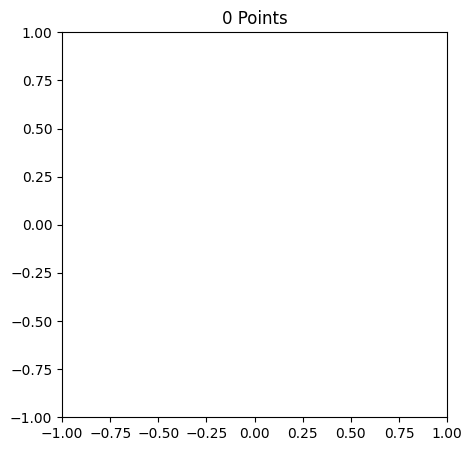

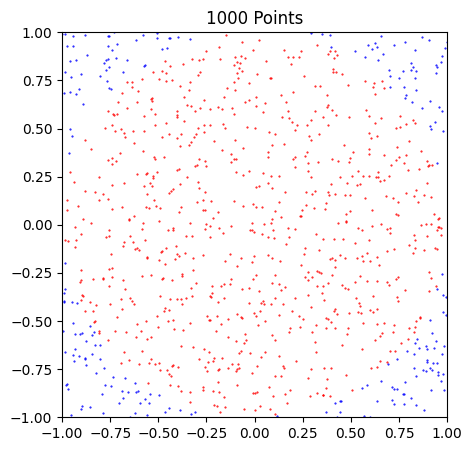

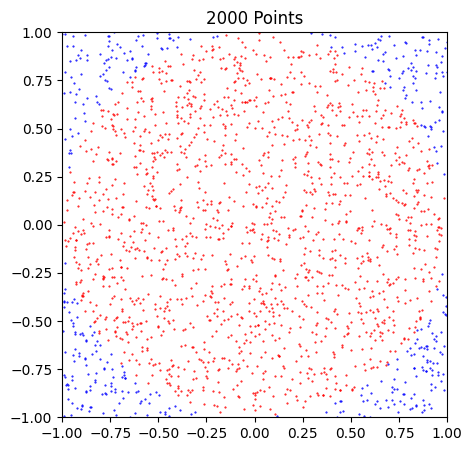

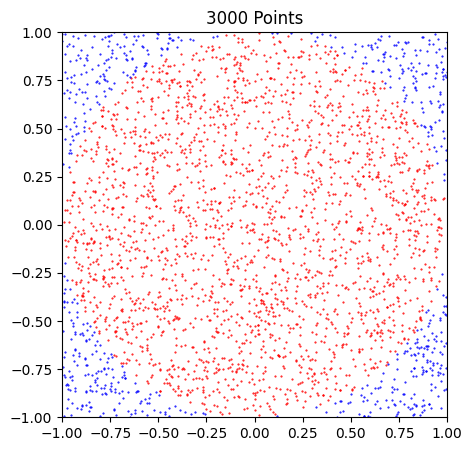

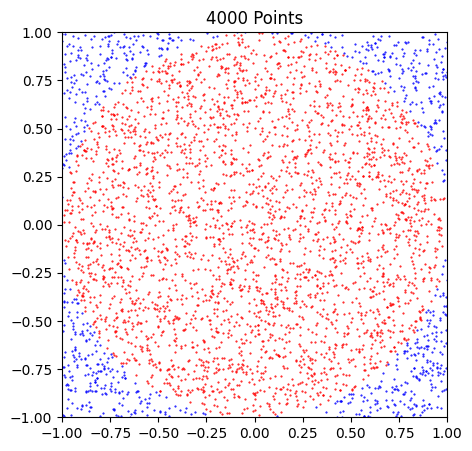

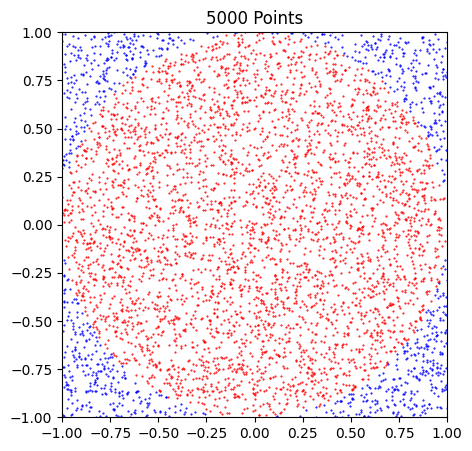

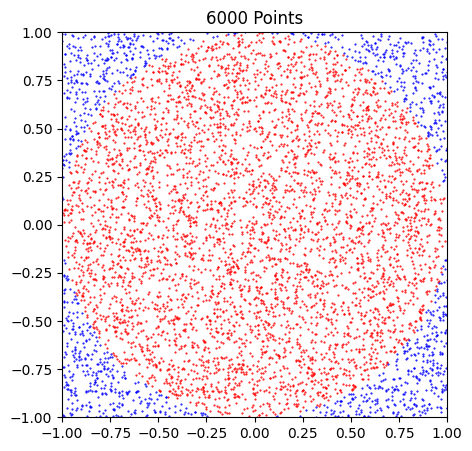

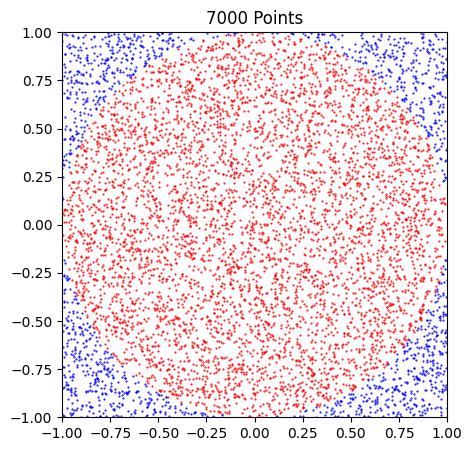

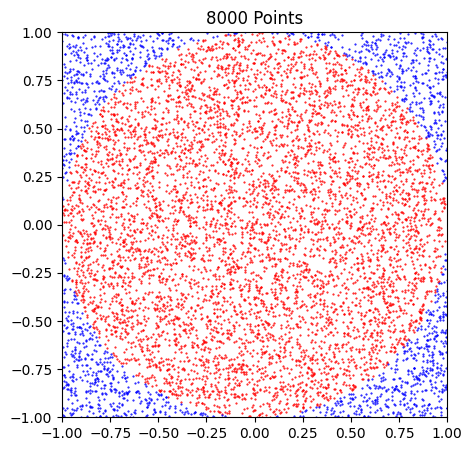

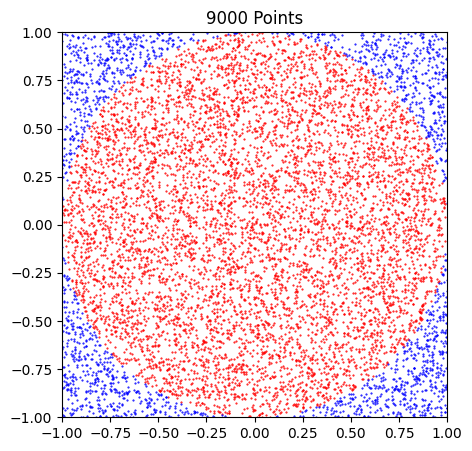

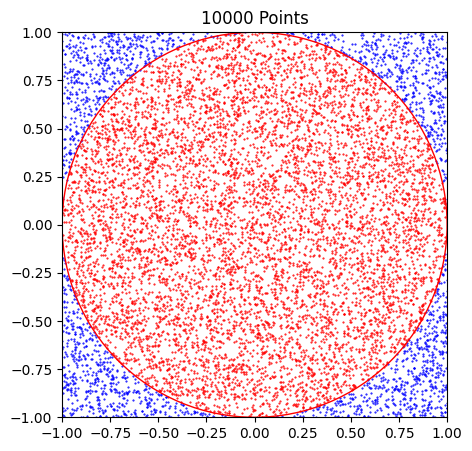

In [2]:
visualization_range = range(0, 11000, 1000)
for point_count in visualization_range:
    new_points = points[:point_count] * 2 - 1  # Scale points to range [-1, 1]
    plt.figure(figsize=(5, 5))
    inside_circle = new_points[np.sum(new_points**2, axis=1) <= 1]
    outside_circle = new_points[np.sum(new_points**2, axis=1) > 1]
    plt.scatter(inside_circle[:, 0], inside_circle[:, 1], s=0.25, color="red")
    plt.scatter(outside_circle[:, 0], outside_circle[:, 1], s=0.25, color="blue")
    if point_count == visualization_range.stop - visualization_range.step:
        circle = plt.Circle((0, 0), 1, color="r", fill=False)
        plt.gca().add_artist(circle)
    plt.title(f"{point_count} Points")
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect("equal", adjustable="box")
    plt.show()